32.489417, -119.364722
32°29'21.9"N 119°21'53.0"W


In [ ]:
listOfImages = myCollection.toList(myCollection.size())
img1 = ee.Image(listOfImages.get(0))
img2 = ee.Image(listOfImages.get(1))


In [ ]:
#*
 # Function to mask clouds using the Sentinel-2 QA band
 # @param {ee.Image} image Sentinel-2 image
 # @return {ee.Image} cloud masked Sentinel-2 image
 #
def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) \ \
      .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask).divide(10000) \ \
  .copyProperties(image, ['system:time_start'])

# Map the function over one year of data
# Load Sentinel-2 TOA reflectance data.
dataset = ee.ImageCollection('COPERNICUS/S2') \ \
                  .filterDate('2015-06-23', '2019-07-02') \ \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \ \
                  .select('B2','B3','B4','B8','QA60') \ \
                  .filterBounds(geometry) \ \
                  .map(maskS2clouds)

rgbVis = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
}

def func_qmn(im):
   return im.clip(geometry)

clippedCol=dataset.map(func_qmn)

print(clippedCol)

#function to calculate NDVI
def addNDVI(image):
  ndvi = image.normalizedDifference(['B8', 'B4']) \ \
  .rename('NDVI') \ \
  .copyProperties(image,['system:time_start'])
  return image.addBands(ndvi)

#NDVI to the clipped image collection
withNDVI = clippedCol.map(addNDVI).select('NDVI')

colorizedVis = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}

listOfImages = withNDVI.toList(withNDVI.size())
print('List:',listOfImages)
img1 = ee.Image(listOfImages.get(0))

Map.addLayer(img1,colorizedVis,'img1')


In [ ]:
#*
 # Function to mask clouds using the Sentinel-2 QA band
 # @param {ee.Image} image Sentinel-2 image
 # @return {ee.Image} cloud masked Sentinel-2 image
 #
def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) \
      .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask).divide(10000) \
  .copyProperties(image, ['system:time_start'])

# Map the function over one year of data
# Load Sentinel-2 TOA reflectance data.
dataset = ee.ImageCollection('COPERNICUS/S2') \
                  .filterDate('2015-06-23', '2019-07-02') \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                  .select('B2','B3','B4','B8','QA60') \
                  .filterBounds(geometry) \
                  .map(maskS2clouds)

rgbVis = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
}

def func_qmn(im):
   return im.clip(geometry)

clippedCol=dataset.map(func_qmn)

print(clippedCol)

#function to calculate NDVI
def addNDVI(image):
  ndvi = image.normalizedDifference(['B8', 'B4']) \
  .rename('NDVI') \
  .copyProperties(image,['system:time_start'])
  return image.addBands(ndvi)

#NDVI to the clipped image collection
withNDVI = clippedCol.map(addNDVI).select('NDVI')

colorizedVis = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}

listOfImages = withNDVI.toList(withNDVI.size())
print('List:',listOfImages)
img1 = listOfImages.get(0)

Map.addLayer(img1,colorizedVis,'img1')


In [ ]:
print(collection.first().propertyNames())


In [ ]:
print(collection.aggregate_array('LANDSAT_PRODUCT_ID'))


In [ ]:
listOfImages = myCollection.toList(myCollection.size())
img1 = ee.Image(listOfImages.get(0))
img2 = ee.Image(listOfImages.get(1))


In [ ]:
#*
 # Function to mask clouds using the Sentinel-2 QA band
 # @param {ee.Image} image Sentinel-2 image
 # @return {ee.Image} cloud masked Sentinel-2 image
 #
def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) \ \
      .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask).divide(10000) \ \
  .copyProperties(image, ['system:time_start'])

# Map the function over one year of data
# Load Sentinel-2 TOA reflectance data.
dataset = ee.ImageCollection('COPERNICUS/S2') \ \
                  .filterDate('2015-06-23', '2019-07-02') \ \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \ \
                  .select('B2','B3','B4','B8','QA60') \ \
                  .filterBounds(geometry) \ \
                  .map(maskS2clouds)

rgbVis = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
}

def func_qmn(im):
   return im.clip(geometry)

clippedCol=dataset.map(func_qmn)

print(clippedCol)

#function to calculate NDVI
def addNDVI(image):
  ndvi = image.normalizedDifference(['B8', 'B4']) \ \
  .rename('NDVI') \ \
  .copyProperties(image,['system:time_start'])
  return image.addBands(ndvi)

#NDVI to the clipped image collection
withNDVI = clippedCol.map(addNDVI).select('NDVI')

colorizedVis = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}

listOfImages = withNDVI.toList(withNDVI.size())
print('List:',listOfImages)
img1 = ee.Image(listOfImages.get(0))

Map.addLayer(img1,colorizedVis,'img1')


In [12]:
def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) \
      .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask)

#we can use this to make a rectangle to filter the data with
AOI_poly = ee.Geometry.Rectangle([-120.0831, 31.9968,-118.6217, 32.9468])

AOI_point = ee.Geometry.Point([-119.364722,32.489417 ])
Map.addLayer(AOI_poly , name ='AOI')

In [4]:
sentinel_collection = ee.ImageCollection("COPERNICUS/S2_SR")
visualization_params = {
  'bands': ['B4', 'B3', 'B2'],"min":0.0, "max":0.3,
}
vis_params_NIR =  {
  'bands': ['B8'],"min":0.0, "max":0.3,}


sentinel_collection = sentinel_collection.filterBounds(AOI_poly).filterDate('2017-01-01','2020-01-28').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20))#.map(maskS2clouds)
mean_image  = sentinel_collection.map(maskS2clouds).mean().divide(10000)
median_image  = sentinel_collection.map(maskS2clouds).median().divide(10000)



#how to get stats for a particular image
# image = sentinel_collection.first()
# properties = geemap.image_props(image).getInfo()
# stats = geemap.image_stats(image).getInfo()

Map.addLayer(mean_image,visualization_params, 'mean image')
Map.addLayer(median_image,visualization_params, 'median image')
Map.addLayer(mean_image,vis_params_NIR, 'NIR')

In [5]:
# Get the number of images.
count = sentinel_collection.size().getInfo()
print('Count of Images: ', count)

from datetime import datetime as dt
# Get the date range of images in the collection.
rango = sentinel_collection.reduceColumns(ee.Reducer.minMax(), ["system:time_start"])

# Passing numeric date to standard
init_date = ee.Date(rango.get('min')).getInfo()['value']/1000.
init_date_f = dt.utcfromtimestamp(init_date).strftime('%Y-%m-%d %H:%M:%S')
last_date = ee.Date(rango.get('max')).getInfo()['value']/1000.
last_date_f = dt.utcfromtimestamp(last_date).strftime('%Y-%m-%d %H:%M:%S')

print('Date range: ',init_date_f,' - ',last_date_f)

Count of Images:  288
Date range:  2018-12-13 18:55:02  -  2020-01-27 18:55:15


In [6]:
sentinel_collection.reduce(ee.Reducer.minMax()).getInfo()['bands']

[{'id': 'B1_min',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transform': [1, 0, 0, 0, 1, 0]},
 {'id': 'B1_max',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transform': [1, 0, 0, 0, 1, 0]},
 {'id': 'B2_min',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transform': [1, 0, 0, 0, 1, 0]},
 {'id': 'B2_max',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transform': [1, 0, 0, 0, 1, 0]},
 {'id': 'B3_min',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transform': [1, 0, 0, 0, 1, 0]},
 {'id': 'B3_max',
  'data_type': {'type': 'PixelType',
   'precision': 'int',
   'min': 0,
   'max': 65535},
  'crs': 'EPSG:4326',
  'crs_transfo

Below is a print of all the images in the sentinel collection

In [59]:
sentinel_collection.aggregate_array('system:index').getInfo()

['20181213T184759_20181213T185036_T10SGB',
 '20181213T184759_20181213T185036_T11SKR',
 '20181213T184759_20181213T185036_T11SKS',
 '20181213T184759_20181213T185036_T11SLS',
 '20181215T183751_20181215T184316_T10SGB',
 '20181215T183751_20181215T184316_T11SKR',
 '20181215T183751_20181215T184316_T11SKS',
 '20181215T183751_20181215T184316_T11SLR',
 '20181215T183751_20181215T184316_T11SLS',
 '20181218T184801_20181218T185122_T10SGB',
 '20181218T184801_20181218T185122_T11SKS',
 '20181223T184759_20181223T185459_T11SLS',
 '20181225T183751_20181225T184325_T11SKS',
 '20181225T183751_20181225T184325_T11SLS',
 '20181228T184801_20181228T185119_T10SGB',
 '20181228T184801_20181228T185119_T11SKR',
 '20181228T184801_20181228T185119_T11SKS',
 '20181228T184801_20181228T185119_T11SLS',
 '20181230T183759_20181230T183754_T10SGB',
 '20181230T183759_20181230T183754_T11SKR',
 '20181230T183759_20181230T183754_T11SKS',
 '20181230T183759_20181230T183754_T11SLR',
 '20181230T183759_20181230T183754_T11SLS',
 '20190102T

## Working on Specific Images

In [60]:
# sentinel_image = sentinel_collection.filterBounds(AOI_poly).filterDate('2020-01-01','2020-01-28').sort("CLOUD_COVER").first()
sentinel_image = ee.Image('COPERNICUS/S2_SR/20181228T184801_20181228T185119_T11SKS')
#######NDWI###########
# Create an NDWI image, define visualization parameters and display.
ndwi = sentinel_image.normalizedDifference(['B3', 'B8'])

# # Mask the non-watery parts of the image, where NDWI < 0.4.
# ndwiMasked = ndwi.updateMask(ndwi.gte(0.4))
# ndwiId = ndwiMasked.getMapId({'min': 0.5, 'max': 1, 'palette': ['00FFFF', '0000FF']})
Map.addLayer(ndwi,name='ndwi')

Text(0.5, 1.0, 'cdf for cloud pixel percentage')

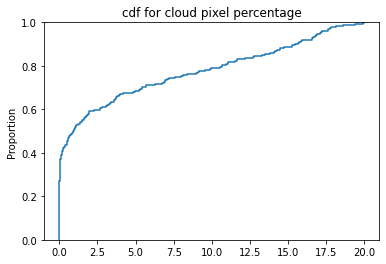

In [9]:
fig, ax = plt.subplots()
sns.ecdfplot(sentinel_collection.aggregate_array('CLOUDY_PIXEL_PERCENTAGE').getInfo(),)
plt.title('cdf for cloud pixel percentage')


In [10]:
Map.addLayer(sentinel_collection.mean(),visualization_params, 'RGB')

In [ ]:
#*
 # Function to mask clouds using the Sentinel-2 QA band
 # @param {ee.Image} image Sentinel-2 image
 # @return {ee.Image} cloud masked Sentinel-2 image
 #
def maskS2clouds(image):
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = qa.bitwiseAnd(cloudBitMask).eq(0) \
      .And(qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask).divide(10000) \
  .copyProperties(image, ['system:time_start'])

# Map the function over one year of data
# Load Sentinel-2 TOA reflectance data.
dataset = ee.ImageCollection('COPERNICUS/S2') \
                  .filterDate('2015-06-23', '2019-07-02') \
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)) \
                  .select('B2','B3','B4','B8','QA60') \
                  .filterBounds(geometry) \
                  .map(maskS2clouds)

rgbVis = {
  'min': 0.0,
  'max': 0.3,
  'bands': ['B4', 'B3', 'B2'],
}

def func_qmn(im):
   return im.clip(geometry)

clippedCol=dataset.map(func_qmn)

print(clippedCol)

#function to calculate NDVI
def addNDVI(image):
  ndvi = image.normalizedDifference(['B8', 'B4']) \
  .rename('NDVI') \
  .copyProperties(image,['system:time_start'])
  return image.addBands(ndvi)

#NDVI to the clipped image collection
withNDVI = clippedCol.map(addNDVI).select('NDVI')

colorizedVis = {
  'min': 0.0,
  'max': 1.0,
  'palette': [
    'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901',
    '66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
    '012E01', '011D01', '011301'
  ],
}

listOfImages = withNDVI.toList(withNDVI.size())
print('List:',listOfImages)
img1 = listOfImages.get(0)

Map.addLayer(img1,colorizedVis,'img1')


In [ ]:
print(collection.first().propertyNames())


In [ ]:
print(collection.aggregate_array('LANDSAT_PRODUCT_ID'))


In [1]:
import ee
import geemap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
Map = geemap.Map(center=[32.489417, -119.364722], zoom=10)
Map

Map(center=[32.489417, -119.364722], controls=(WidgetControl(options=['position'], widget=HBox(children=(Toggl…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>